# 1 导入库和设置

In [19]:
import pandas as pd
import jieba
import jieba.analyse
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import os
import json
from IPython.display import display, Markdown

# 设置中文显示
plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False

In [20]:
# 准备停用词
if not os.path.exists('cn_stopwords.txt'):
    basic_stopwords = """的 了 在 是 我 有 和 就 不 人 都 一个 也 很 到 说 要 去 你 会 着 没有 看 好 自己 这 上 我们""".split()
    with open('stopwords.txt', 'w', encoding='utf-8') as f:
        f.write('\n'.join(basic_stopwords))
    print("已创建基础停用词文件 stopwords.txt")

with open('cn_stopwords.txt', 'r', encoding='utf-8') as f:
    stopwords = set([line.strip() for line in f if line.strip()])

# 2 定义分析函数

In [21]:
def analyze_dataset(df, dataset_name):
    """分析单个数据集"""
    display(Markdown(f"## 数据集分析: {dataset_name}"))
    
    # 检查字段1是否存在
    if '字段1' not in df.columns:
        display(Markdown(f"⚠️ 警告：数据集 {dataset_name} 中缺少'字段1'列"))
        return None
    
    # 基本统计
    display(Markdown("### 基本统计"))
    df['comment_length'] = df['字段1'].astype(str).apply(len)
    display(df['comment_length'].describe())
    
    # 长度分布图
    plt.figure(figsize=(10,5))
    df['comment_length'].hist(bins=50)
    plt.title(f'{dataset_name} - 评论长度分布')
    plt.xlabel('评论长度(字符数)')
    plt.ylabel('频数')
    plt.show()
    
    # 分词和词频
    display(Markdown("### 词频分析"))
    all_words = []
    for comment in df['字段1'].astype(str):
        words = [word for word in jieba.cut(comment) 
                if word not in stopwords and len(word) > 1 and not word.isspace()]
        all_words.extend(words)
    
    word_counts = Counter(all_words).most_common(20)
    print("高频词TOP20:")
    for word, count in word_counts:
        print(f"{word}: {count}")
    
    # 词云
    wordcloud = WordCloud(
        font_path='simhei.ttf',
        background_color='white',
        width=800,
        height=600
    ).generate_from_frequencies(dict(word_counts))
    
    plt.figure(figsize=(12,8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'{dataset_name} - 评论词云')
    plt.show()
    
    # 关键词提取
    display(Markdown("### 关键词提取"))
    text = ' '.join(df['字段1'].astype(str))
    keywords = jieba.analyse.extract_tags(text, topK=15, withWeight=True)
    print("关键词TOP15:")
    for word, weight in keywords:
        print(f"{word}: {weight:.3f}")
    
    # 返回结果
    return {
        'dataset_name': dataset_name,
        'word_counts': word_counts,
        'keywords': keywords,
        'comment_count': len(df)
    }

# 3 加载和分析每个数据集

## 数据集分析: 阿里健康大药房

### 基本统计

count    1044.000000
mean       25.068008
std        29.416606
min         1.000000
25%         7.000000
50%        15.000000
75%        33.000000
max       320.000000
Name: comment_length, dtype: float64

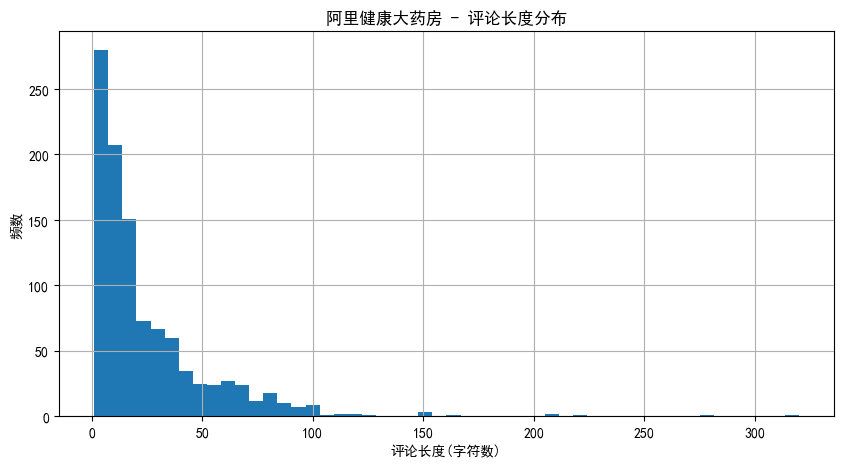

### 词频分析

高频词TOP20:
质量: 221
老人: 219
不错: 203
方便: 162
非常: 123
轻便: 99
助行器: 86
满意: 86
结实: 78
收到: 73
好用: 72
使用: 71
发货: 64
好评: 61
实用: 61
物流: 56
起来: 55
安装: 54
客服: 54
值得: 54


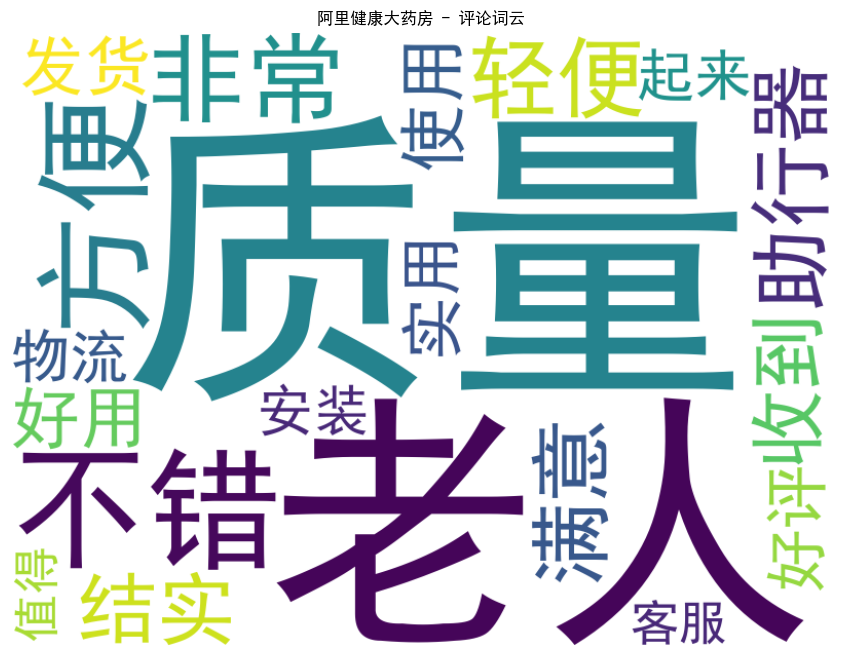

### 关键词提取

关键词TOP15:
老人: 0.168
质量: 0.154
不错: 0.151
助行器: 0.124
方便: 0.123
轻便: 0.103
好用: 0.092
发货: 0.078
结实: 0.075
非常: 0.072
满意: 0.071
可以: 0.067
好评: 0.064
收到: 0.059
客服: 0.056


---

## 数据集分析: 福士德

### 基本统计

count    391.000000
mean      23.460358
std       23.950865
min        1.000000
25%        8.000000
50%       17.000000
75%       31.000000
max      187.000000
Name: comment_length, dtype: float64

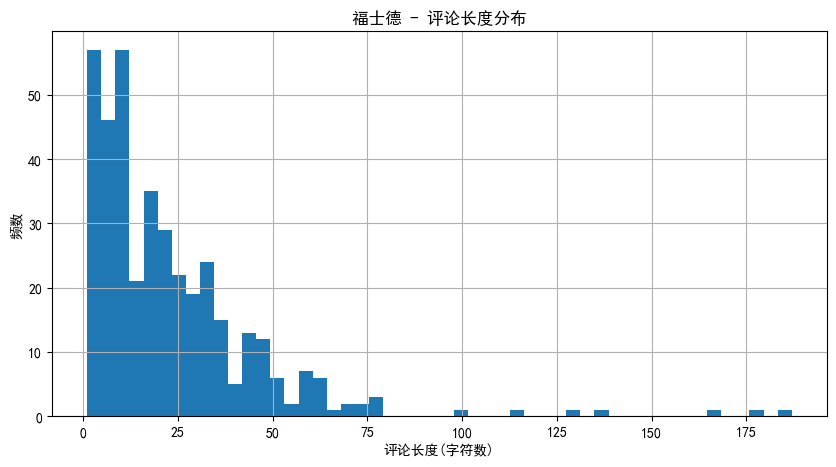

### 词频分析

高频词TOP20:
质量: 115
非常: 86
不错: 78
方便: 74
老人: 66
收到: 40
满意: 36
结实: 34
客服: 33
好用: 27
东西: 27
发货: 26
物流: 24
实用: 24
助行器: 22
值得: 21
购买: 21
轻便: 21
快递: 20
走路: 19


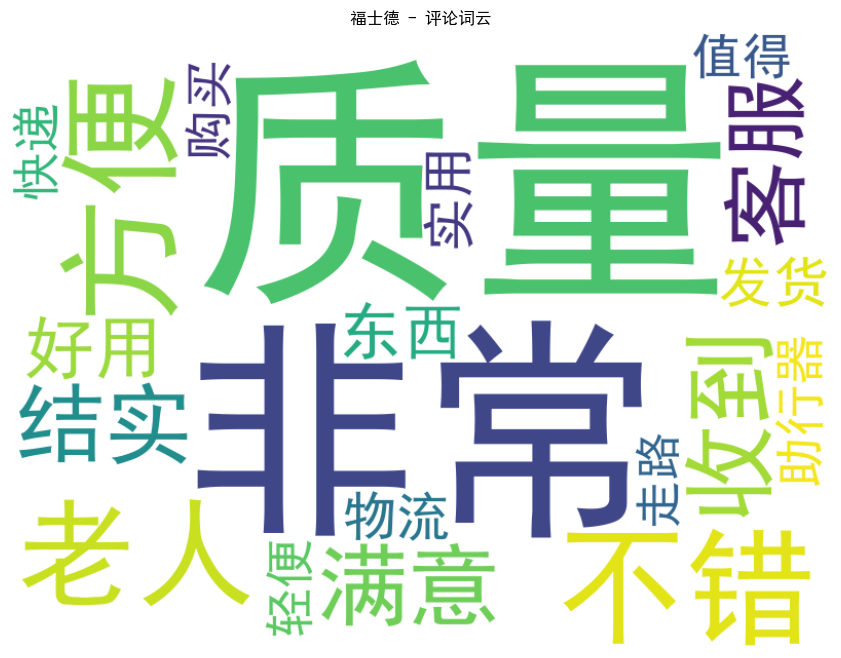

### 关键词提取

关键词TOP15:
质量: 0.236
不错: 0.171
方便: 0.165
非常: 0.149
老人: 0.149
好用: 0.102
客服: 0.101
结实: 0.096
收到: 0.095
发货: 0.094
助行器: 0.093
满意: 0.087
快递: 0.071
可以: 0.066
实用: 0.065


---

## 数据集分析: 耀典

### 基本统计

count    319.000000
mean      17.793103
std       16.274410
min        1.000000
25%        6.000000
50%       12.000000
75%       25.000000
max      109.000000
Name: comment_length, dtype: float64

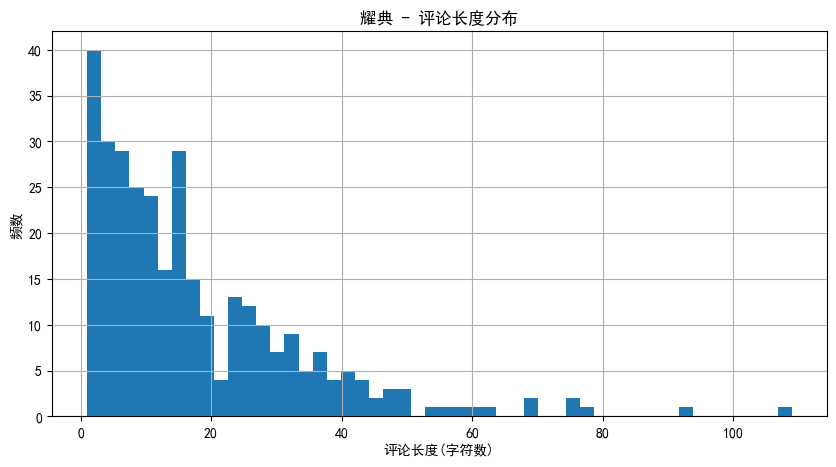

### 词频分析

高频词TOP20:
不错: 69
质量: 68
非常: 51
老人: 46
方便: 43
收到: 36
好评: 31
满意: 29
购买: 24
结实: 17
物流: 17
值得: 16
喜欢: 16
发货: 15
很快: 15
东西: 15
好用: 13
走路: 13
助行器: 12
轻便: 12


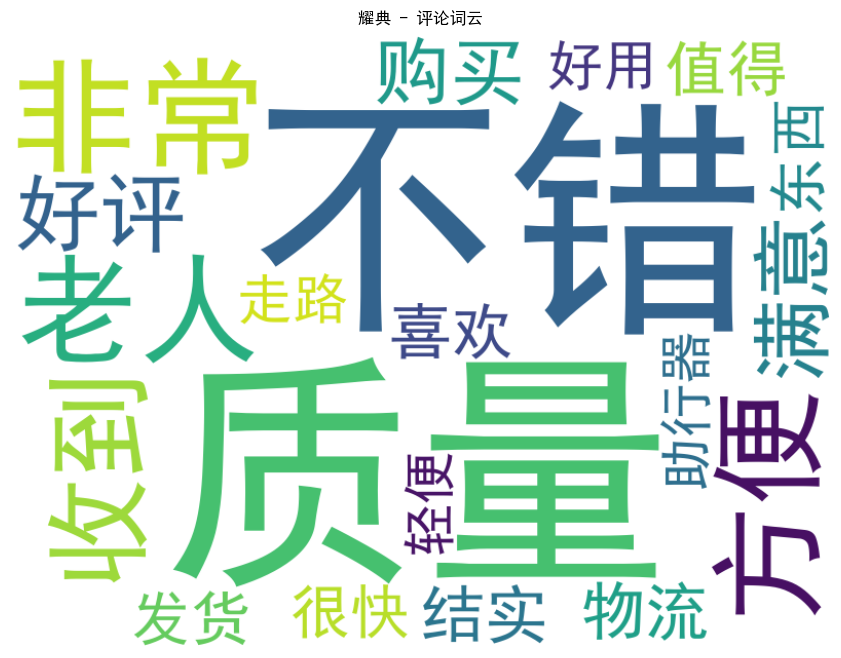

### 关键词提取

关键词TOP15:
不错: 0.241
质量: 0.223
老人: 0.165
方便: 0.153
好评: 0.152
非常: 0.141
收到: 0.136
满意: 0.112
发货: 0.086
助行器: 0.081
好用: 0.078
购买: 0.078
结实: 0.077
老妈: 0.070
物流: 0.068


---

## 数据集分析: hfine

### 基本统计

count    423.000000
mean      27.158392
std       23.219455
min        1.000000
25%       12.000000
50%       23.000000
75%       34.000000
max      200.000000
Name: comment_length, dtype: float64

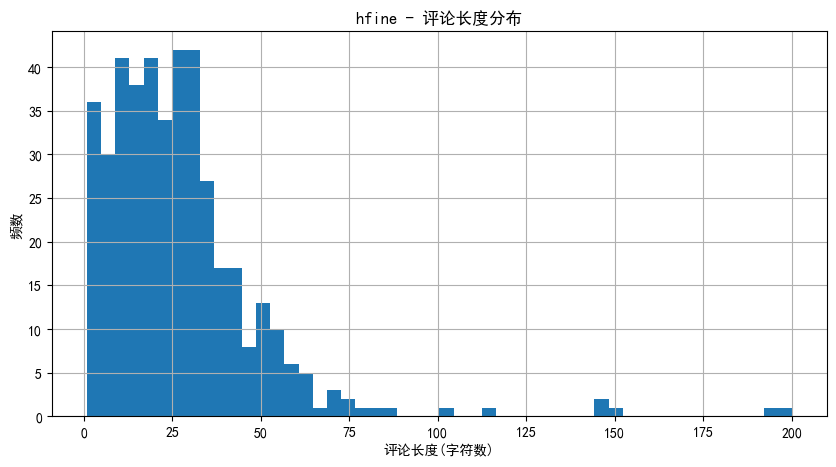

### 词频分析

高频词TOP20:
质量: 128
老人: 97
不错: 90
方便: 87
非常: 78
轻便: 66
满意: 46
结实: 41
起来: 41
使用: 39
喜欢: 30
收到: 30
助行器: 28
走路: 28
客服: 27
购买: 27
材质: 26
物流: 26
发货: 25
实用: 24


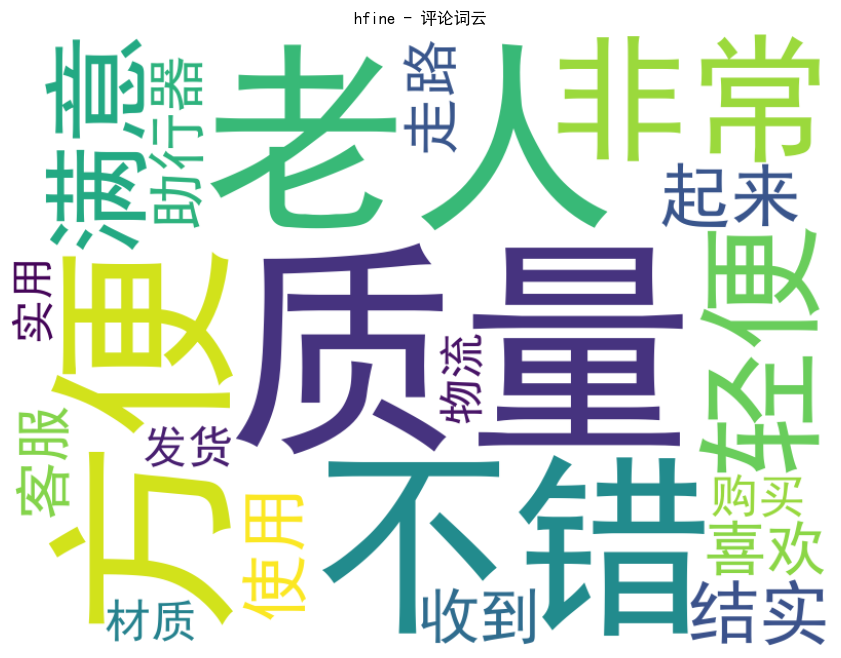

### 关键词提取

关键词TOP15:
质量: 0.207
老人: 0.172
轻便: 0.158
不错: 0.155
方便: 0.153
非常: 0.107
助行器: 0.093
结实: 0.091
满意: 0.088
发货: 0.071
客服: 0.065
可以: 0.064
材质: 0.063
好用: 0.059
走路: 0.059


---

In [22]:
file_paths = [
    'raw_data\阿里健康大药房.xlsx',
    'raw_data\福士德.xlsx', 
    'raw_data\耀典.xlsx',
    'raw_data\hfine.xlsx'
]

all_results = {}
combined_df = pd.DataFrame()

for file_path in file_paths:
    if not os.path.exists(file_path):
        print(f"文件不存在: {file_path}")
        continue
    
    try:
        # 读取数据
        df = pd.read_excel(file_path)
        if '字段1' not in df.columns:
            print(f"文件 {file_path} 中缺少'字段1'列，跳过分析")
            continue
            
        df['source_file'] = os.path.basename(file_path)
        combined_df = pd.concat([combined_df, df], ignore_index=True)
        
        # 分析单个数据集
        dataset_name = os.path.splitext(os.path.basename(file_path))[0]
        result = analyze_dataset(df, dataset_name)
        if result:  # 只有分析成功才保存结果
            all_results[dataset_name] = result
        
        # 添加分隔线
        display(Markdown("---"))
    except Exception as e:
        print(f"处理文件 {file_path} 时出错: {str(e)}")

# 4 保存各数据集分析结果

In [24]:
output_dir = 'analysis_results'
os.makedirs(output_dir, exist_ok=True)

# 保存每个数据集的分析结果
for dataset_name, result in all_results.items():
    # 保存词频
    pd.DataFrame(result['word_counts'], columns=['word', 'count']).to_excel(
        f'{output_dir}/{dataset_name}_word_freq.xlsx', index=False)
    
    # 保存关键词
    pd.DataFrame(result['keywords'], columns=['keyword', 'weight']).to_excel(
        f'{output_dir}/{dataset_name}_keywords.xlsx', index=False)

print(f"各数据集分析结果已保存到 {output_dir} 目录")

各数据集分析结果已保存到 analysis_results 目录
